In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:13<00:00, 169MB/s]
100% 1.06G/1.06G [00:13<00:00, 84.5MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

In [6]:
#generators -create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#ormalisation
def process(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
#CNN model
model= Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:





history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 106ms/step - loss: 1.2942 - accuracy: 0.6004 - val_loss: 0.5959 - val_accuracy: 0.6934
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5538 - accuracy: 0.7171 - val_loss: 0.5556 - val_accuracy: 0.6988
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5059 - accuracy: 0.7634 - val_loss: 0.4828 - val_accuracy: 0.7672
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4240 - accuracy: 0.8080 - val_loss: 0.4881 - val_accuracy: 0.7638
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4121 - accuracy: 0.8181 - val_loss: 0.5415 - val_accuracy: 0.7580
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3190 - accuracy: 0.8651 - val_loss: 0.5312 - val_accuracy: 0.7952
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2487 - accuracy: 0.8964 - val_loss: 0.4676 - val_ac

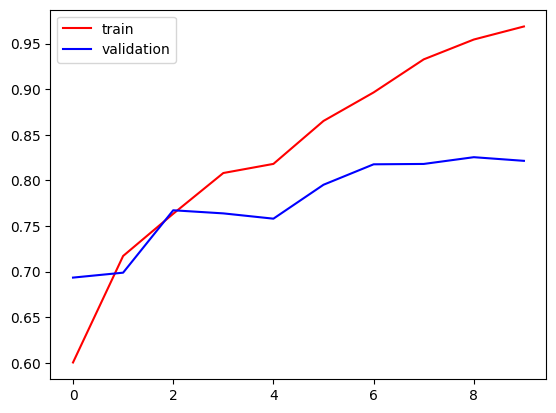

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

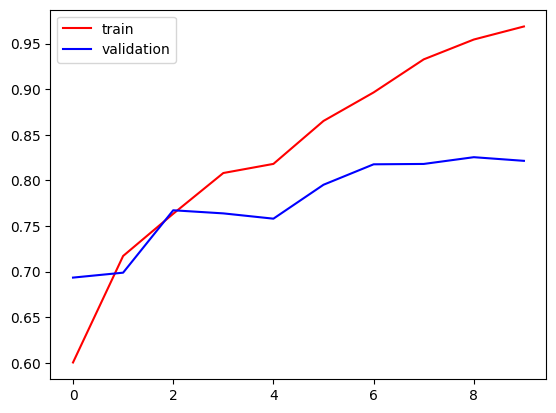

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

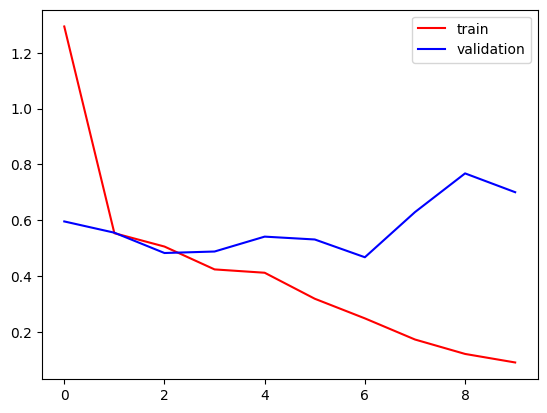

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

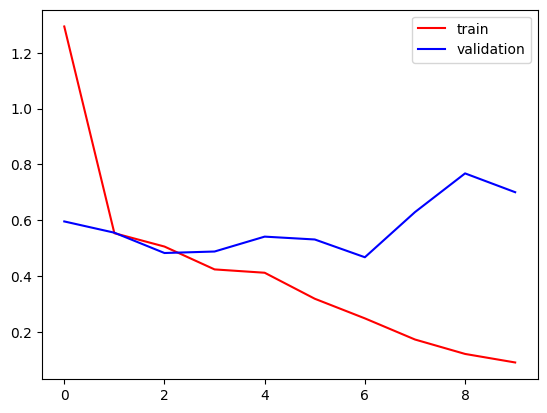

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
#reduce coomplexity

import cv2
test_image = cv2.imread('/content/cat.jpg')

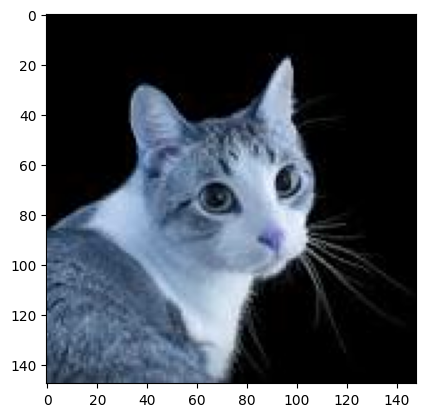

In [17]:
plt.imshow(test_image)

In [18]:
test_image.shape

(148, 148, 3)

In [19]:
test_image = cv2.resize(test_image,(256,256))

In [20]:
test_input = test_image.reshape(1,256,256,3)

In [21]:
model.predict(test_input)

1/1 [==============================] - 0s 379ms/step


array([[0.]], dtype=float32)

In [22]:
import cv2
test_image = cv2.imread('/content/dog.jpg')

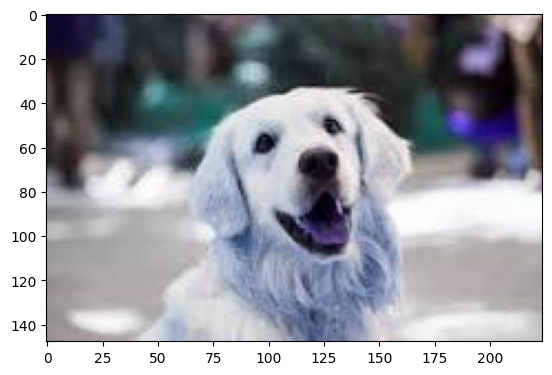

In [23]:
plt.imshow(test_image)

In [24]:
test_image.shape

(148, 224, 3)

In [25]:
test_image = cv2.resize(test_image,(256,256))

In [26]:
test_input = test_image.reshape(1,256,256,3)

In [27]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)